### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [32]:
Crime=pd.read_csv("C:\\Users\\pratiksha\\Documents\\Excelar\\data science assinements\\clustering\\crime_data.csv")
Crime.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [3]:
Crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
Crime.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [5]:
Crime.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [6]:
Crime_data=Crime.rename({"Unnamed: 0":"Places"},axis=0)
Crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
Crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.3+ KB


In [8]:
Crime_data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

## EDA

In [9]:
Crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [10]:
Crime_data.corr()

C:\Users\pratiksha\AppData\Local\Temp\ipykernel_4288\1753934709.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Crime_data.corr()


,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


## Hierarchical Clustering

In [11]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [12]:
df_norm = norm_func(Crime_data.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


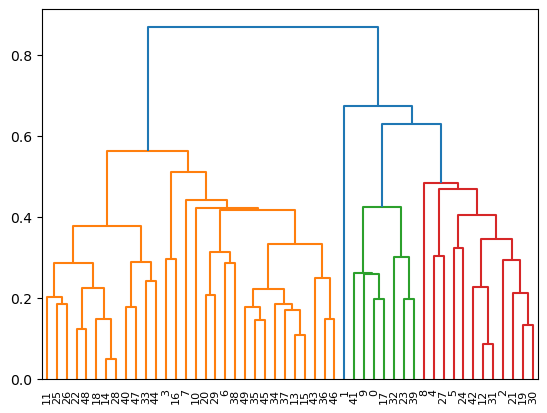

In [13]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [14]:
hc=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete")
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [15]:
# save clusters for chart
x_hc=hc.fit_predict(df_norm)
x_hc

C:\Users\pratiksha\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [16]:
Crime_data['h_clusterid'] = hc.labels_
Crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


## K-Means Clustering

In [17]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

C:\Users\pratiksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pratiksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pratiksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pratiksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL

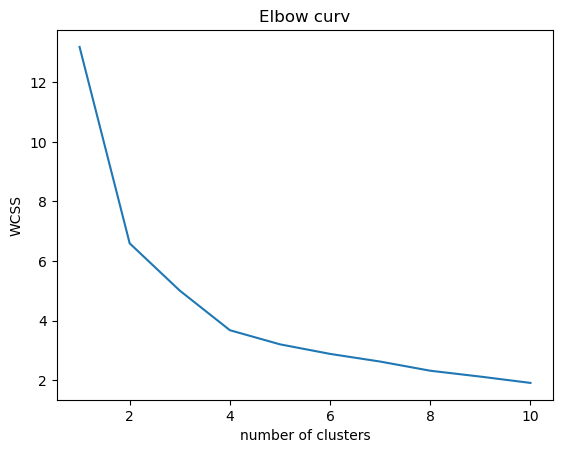

In [18]:
wcss=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i)
    Kmeans.fit(df_norm)
    wcss.append(Kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

### After 4 it will be constant So we take k=4

In [19]:
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(df_norm)

C:\Users\pratiksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pratiksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [20]:
clusters_new.labels_

array([2, 3, 3, 2, 3, 3, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 3, 0, 3,
       1, 2, 3, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       1, 0, 0, 1, 1, 0])

In [21]:
x=pd.Series(clusters_new.labels_)
Crime_data['K_Clust']=x
Crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,K_Clust
0,Alabama,13.2,236,58,21.2,0,2
1,Alaska,10.0,263,48,44.5,0,3
2,Arizona,8.1,294,80,31.0,0,3
3,Arkansas,8.8,190,50,19.5,1,2
4,California,9.0,276,91,40.6,0,3
5,Colorado,7.9,204,78,38.7,0,3
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,0,3
9,Georgia,17.4,211,60,25.8,0,2


In [23]:
Crime_data.iloc[:,1:5].groupby(Crime_data.K_Clust).mean()

,Murder,Assault,UrbanPop,Rape
K_Clust,,,,
0,5.656250,138.875000,73.875000,18.781250
1,3.600000,78.538462,52.076923,12.176923
2,13.937500,243.625000,53.750000,21.412500
3,10.815385,257.384615,76.000000,33.192308


## DBSCAN 

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [25]:
df_norm=df_norm.iloc[:,1:5]
df_norm.values

array([[0.65410959, 0.44067797, 0.35917313],
       [0.74657534, 0.27118644, 0.96124031],
       [0.85273973, 0.81355932, 0.6124031 ],
       [0.49657534, 0.30508475, 0.31524548],
       [0.79109589, 1.        , 0.86046512],
       [0.54452055, 0.77966102, 0.81136951],
       [0.22260274, 0.76271186, 0.09819121],
       [0.6609589 , 0.6779661 , 0.21963824],
       [0.99315068, 0.81355932, 0.63565891],
       [0.56849315, 0.47457627, 0.47803618],
       [0.00342466, 0.86440678, 0.33333333],
       [0.25684932, 0.37288136, 0.17829457],
       [0.69863014, 0.86440678, 0.43152455],
       [0.23287671, 0.55932203, 0.35400517],
       [0.03767123, 0.42372881, 0.10335917],
       [0.23972603, 0.57627119, 0.27648579],
       [0.21917808, 0.33898305, 0.23255814],
       [0.69863014, 0.57627119, 0.38501292],
       [0.13013699, 0.3220339 , 0.0129199 ],
       [0.87328767, 0.59322034, 0.52971576],
       [0.35616438, 0.89830508, 0.23255814],
       [0.71917808, 0.71186441, 0.71834625],
       [0.

In [26]:
stscaler = StandardScaler().fit(df_norm.values)
X = stscaler.transform(df_norm.values)
X

array([[ 0.79078716, -0.52619514, -0.00345116],
       [ 1.11805959, -1.22406668,  2.50942392],
       [ 1.49381682,  1.00912225,  1.05346626],
       [ 0.23321191, -1.08449238, -0.18679398],
       [ 1.2756352 ,  1.77678094,  2.08881393],
       [ 0.40290872,  0.86954794,  1.88390137],
       [-0.73648418,  0.79976079, -1.09272319],
       [ 0.81502956,  0.45082502, -0.58583422],
       [ 1.99078607,  1.00912225,  1.1505301 ],
       [ 0.48775713, -0.38662083,  0.49265293],
       [-1.51224105,  1.21848371, -0.11129987],
       [-0.61527217, -0.80534376, -0.75839217],
       [ 0.94836277,  1.21848371,  0.29852525],
       [-0.70012057, -0.03768506, -0.0250209 ],
       [-1.39102904, -0.5959823 , -1.07115345],
       [-0.67587817,  0.03210209, -0.34856705],
       [-0.74860538, -0.94491807, -0.53190987],
       [ 0.94836277,  0.03210209,  0.10439756],
       [-1.06375661, -1.01470522, -1.44862395],
       [ 1.56654403,  0.10188925,  0.70835037],
       [-0.26375734,  1.35805802, -0.531

In [27]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=2)

In [28]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [29]:
cl=pd.DataFrame(dbscan.labels_,columns=['DBscan'])

In [30]:
pd.concat([Crime_data,cl],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,K_Clust,DBscan
0,Alabama,13.2,236,58,21.2,0,2,0
1,Alaska,10.0,263,48,44.5,0,3,-1
2,Arizona,8.1,294,80,31.0,0,3,0
3,Arkansas,8.8,190,50,19.5,1,2,0
4,California,9.0,276,91,40.6,0,3,0
5,Colorado,7.9,204,78,38.7,0,3,0
6,Connecticut,3.3,110,77,11.1,1,0,0
7,Delaware,5.9,238,72,15.8,1,0,0
8,Florida,15.4,335,80,31.9,0,3,0
9,Georgia,17.4,211,60,25.8,0,2,0
